In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
from os.path import join
sys.path.append("../")
import GSHEWaveform

%load_ext autoreload
%autoreload 2

from tqdm import tqdm

fout = "/Users/richard/Downloads"

# BH Shadow: $\log |\beta|$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

grid = data["grid"]
alphas = data["alphas"]
betas = data["betas"]

hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=2500)
vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)

X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(vals), 1000, method="linear")
qs = [1, 99.9] # Colourbar percentiles


GSHEWaveform.setmplstyle()
fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)
fig.colorbar(cm, ax=ax, label=r"$\log |\beta|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig(join(fout, "shadow_beta.pdf"), dpi=600, bbox_inches="tight")
fig.show()

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

grid = data["grid"]
mugeo = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(grid, mugeo, N=200)
mugeo = GSHEWaveform.fillshadow(grid, mugeo, hull)


X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(mugeo**0.5), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles


# GSHEWaveform.setmplstyle("../plot_style.txt")
fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)

fig.colorbar(cm, ax=ax, label=r"$\log \sqrt{|\mu_{\rm GO}|}$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig(join(fout, "shadow_mu.pdf"), dpi=600, bbox_inches="tight")
fig.show()

# Sign dependence of $\Upsilon_{\rm obs}$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)


betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)


betalims = np.logspace(-2.5, 1.5, 1000)
ups_unsign = GSHEWaveform.get_upsilon_obs(
    data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0])
ups_plus = GSHEWaveform.get_upsilon_obs(
    data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=1)
ups_minus = GSHEWaveform.get_upsilon_obs(
    data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=-1)


plt.figure()
plt.title(r"Dependence of $\Upsilon_{\rm obs}$ on $\mathrm{sign}(\beta)$")
plt.plot(betalims, ups_unsign, label="Unsigned")
plt.plot(betalims, ups_plus, label=r"$\beta > 0$")
plt.plot(betalims, ups_minus, label=r"$\beta < 0$")

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
plt.savefig(join(fout, "ups_source.png"), dpi=450)
plt.show()

# Magnification dependence of $\Upsilon_{\rm obs}$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)


betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)

mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)


betalims = np.logspace(-2.5, 1.5, 1000)
plt.figure()
for th in [0, 0.01, 0.1, 1, 10]:
    ups = GSHEWaveform.get_upsilon_obs(
        data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
        magnification=mu, min_magnification=th)
    plt.plot(betalims, ups, label=r"$|\mu| > {}$".format(th))
    
plt.title(r"Dependence of $\Upsilon_{\rm obs}$ on $|\mu|$")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
plt.savefig(join(fout, "ups_source_magnif.png"), dpi=450)
plt.show()

# Dependence of $\Upsilon_{\rm src}$ on $N_{\rm loops}$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)


betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)

mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)


plt.figure()
for nloop_max in [0, 1, 2, 3, None]:
    ups = GSHEWaveform.get_upsilon_src(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], nloop_max=nloop_max)
    plt.plot(betalims, ups, label=r"$N_{{\rm loops}} \leq {}$".format(nloop_max))

plt.xscale("log")
plt.yscale("log")
plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $N_{\rm loos}$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
plt.savefig(join(fout, "ups_source_loops.png"), dpi=450)
plt.show()

# Dependence of $\Upsilon_{\rm src}$ on $|\mu|$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)


betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)

mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)


plt.figure()
for th in [0, 0.01, 0.1, 1, 10]:
    ups = GSHEWaveform.get_upsilon_src(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0)
    plt.plot(betalims, ups, label=r"$|\mu| > {}$".format(th))


plt.xscale("log")
plt.yscale("log")
plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
plt.savefig(join(fout, "ups_source_magnif.png"), dpi=450)
plt.show()

# Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ separated by magnification sign

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)


betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)

mu = data["Xgeo"][:, 8]
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)

cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
ls = {1 : "solid", -1 : "dashed"}
plt.figure()
for i, th in enumerate([0, 0.01, 0.1, 1, 10]):
    for magnification_sign in [1, -1]:
        ups = GSHEWaveform.get_upsilon_src(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0,
            magnification_sign=magnification_sign)
        label=r"$|\mu| > {}$".format(th) if magnification_sign == 1 else None
        plt.plot(betalims, ups, label=label, ls=ls[magnification_sign], c=cols[i])


plt.xscale("log")
plt.yscale("log")
plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$; $\mu > 0 \rightarrow \mathrm{solid}$, $\mu < 0 \rightarrow \mathrm{dashed}$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
plt.savefig(join(fout, "ups_source_magnifsign.png"), dpi=450)
plt.show()

# Relative change of magnification: $|\mu(\epsilon_\max) / \mu_{\rm geo}|$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)
relmu = np.abs(1 - data["Xgshe"][:, -1, 8] / data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], relmu, N=200)
relmu = GSHEWaveform.fillshadow(data["grid"], relmu, hull)


X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(relmu), 2500, method="linear")
qs = [1, 99.99] # Colourbar percentiles

GSHEWaveform.setmplstyle()
fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)

fig.colorbar(cm, ax=ax, label=r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
#plt.savefig("/Users/richard/Downloads/shadow_relmu.pdf", dpi=600, bbox_inches="tight")
fig.show()

# Magnification vs GSHE strength

Eliminating 147 point due to beta with average 0.9592 loops.


<IPython.core.display.Javascript object>


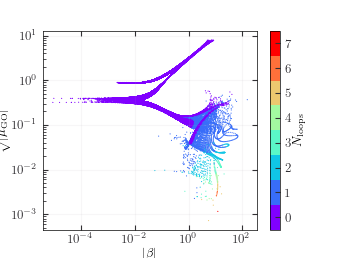

/var/folders/tc/scj1hsmn0gv36xfyx6hsk_g80000gn/T/ipykernel_21416/2332052420.py:17: RuntimeWarning: invalid value encountered in sqrt
  logda = (np.log10(1 / np.sqrt(1 - np.sum(data["grid"]**2, axis=1))))


In [4]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]

notnans = ~np.isnan(Xgeo[:, 2])


GSHEWaveform.setmplstyle("../plot_style.txt")
plt.figure()
cmap = plt.cm.rainbow
ticks = np.arange(0, np.max(Xgeo[notnans, 5]) + 1)
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, np.max(Xgeo[notnans, 5]) + 1), cmap.N)


logda = (np.log10(1 / np.sqrt(1 - np.sum(data["grid"]**2, axis=1))))

logda[notnans] /= np.median(logda[notnans])/4

plt.scatter(betas[notnans, 0], np.abs(Xgeo[notnans, 8])**0.5, c=Xgeo[notnans, 5], s=0.8,
            cmap=cmap, norm=norm, edgecolor="none", rasterized=True, marker="h")
cb = plt.colorbar(ticks=ticks, label=r"$N_{\rm loops}$")
cb.minorticks_off()

plt.xscale("log")
plt.yscale("log")

ylims = list(plt.ylim())
ylims[0] = 3e-5
# plt.ylim(*ylims)
# plt.grid(lw=0.2)

# cb.ax.minorticks_on()

plt.xlabel(r"$|\beta|$")
plt.ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
plt.grid(alpha=0.1)
plt.savefig("/Users/richard/Downloads/beta_mu.pdf", dpi=500, bbox_inches="tight")

plt.show()

# $\mu$ dependence of $\epsilon$

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

notnans = ~np.isnan(Xgeo[:, 8]) & (Xgeo[:, 5] == 0)


relmu = 1 - Xgshe[notnans, ...][:, -1, 8] / Xgeo[notnans, ...][:, 8]
relmu = np.abs(relmu)


GSHEWaveform.setmplstyle()
fig, ax = plt.subplots()

cbar = ax.scatter(betas[notnans, 0], relmu, s=logda[notnans], c=np.log10(np.abs(Xgeo[notnans, 8])), cmap="rainbow")
fig.colorbar(cbar, label=r"$\log |\mu_{\rm geo}|$")


ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xscale("log")
ax.set_yscale("log")
# ax.tick_params(axis='x', which='minor', right=True)


plt.grid(True, which="major", alpha=0.2)
# plt.ylim(1e-7, 1e3)

# plt.savefig("/Users/richard/Downloads/mu_ratio.png", dpi=600)

fig.show()

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]
grid = data["grid"]
N = Xgeo.shape[0]

notnans = ~np.isnan(Xgeo[:, 2])
dt = Xgshe[:, :, 2] - Xgeo[:, 2].reshape(-1, 1)

dtsign = np.sign(dt)

i = 0
delay_consistentsign = np.asarray([np.alltrue(dtsign[i, 1:] == dtsign[i, 0]) for i in range(N)])


dtsign[~delay_consistentsign, :] = np.nan

dtsign = dtsign[:, 0]

parity = np.sign(Xgeo[:, 8])

m = ~(np.isnan(dtsign) | np.isnan(parity))

# dtsign
vals = np.full(N, np.nan)
vals[m] = dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xsign, Ysign, Zsign = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# Parity
vals = np.full(N, np.nan)
vals[m] = parity[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xpar, Ypar, Zpar = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# dtsign == parity sign
vals = np.full(N, np.nan)
vals[m] = parity[m] == dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xcomp, Ycomp, Zcomp = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# GSHE parity sign
vals = np.full(N, np.nan)
vals[m] = np.sign(Xgshe[m, -1, 8])
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xgshe, Ygshe, Zgshe = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


GSHEWaveform.setmplstyle("../plot_style.txt")

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(3.45*2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.1)



axes[0].pcolormesh(-Xsign, Ysign, Zsign, shading="auto", rasterized=True, cmap="rainbow")
axes[1].pcolormesh(-Xpar, Ypar, Zpar, shading="auto", rasterized=True, cmap="rainbow")
axes[2].pcolormesh(-Xgshe, Ygshe, Zgshe, shading="auto", rasterized=True, cmap="rainbow")



for ax in axes:
    ax.set_aspect("equal")
    ax.set_xlabel("$k_3$")
axes[0].set_ylabel("$k_2$")

axes[0].set_title(r"$\mathrm{sign}\bigl(\Delta \tau(\epsilon, s=+2)\bigr)$")
axes[1].set_title(r"$\mathrm{sign}(\mu_{\rm GO})$")
axes[2].set_title(r"$\mathrm{sign}\bigl(\mu(\epsilon=0.01, s=+2)\bigr)$")


#plt.savefig("/Users/richard/Downloads/parity_comp.pdf", dpi=600, bbox_inches="tight")
fig.show()